In [33]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

In [93]:
# Reading image 
font = cv2.FONT_HERSHEY_COMPLEX 
img2 = cv2.imread('dataset/img/img_1.jpg', cv2.IMREAD_COLOR) 
  
# Reading same image in another  
# variable and converting to gray scale. 
img = cv2.imread('dataset/img/img_1.jpg', cv2.IMREAD_GRAYSCALE) 
  
# Converting image to a binary image 
# ( black and white only image). 
_, threshold = cv2.threshold(img, 110, 255, cv2.THRESH_BINARY) 
  
# Detecting contours in image. 
contours, _= cv2.findContours(threshold, cv2.RETR_TREE, 
                               cv2.CHAIN_APPROX_SIMPLE) 
  
# Going through every contours found in the image. 
for cnt in contours : 
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
  
    # draws boundary of contours. 
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)  
  
    # Used to flatted the array containing 
    # the co-ordinates of the vertices. 
    n = approx.ravel()  
    i = 0
  
    for j in n : 
        if(i % 2 == 0): 
            x = n[i] 
            y = n[i + 1] 
  
            # String containing the co-ordinates. 
            string = str(x) + " " + str(y)  
  
            if(i == 0): 
                # text on topmost co-ordinate. 
                cv2.putText(img2, "Arrow tip", (x, y), 
                                font, 0.5, (255, 0, 0))  
            else: 
                # text on remaining co-ordinates. 
                cv2.putText(img2, string, (x, y),  
                          font, 0.5, (0, 255, 0))  
        i = i + 1

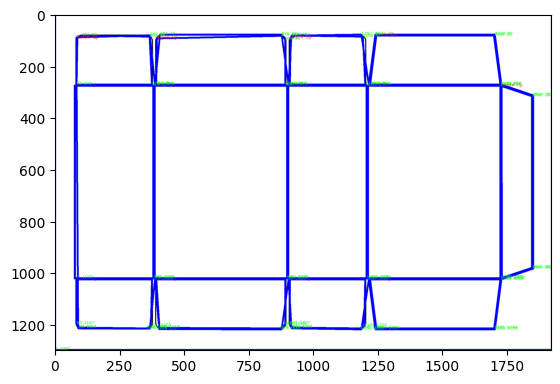

In [94]:
plt.imshow(img2, 'gray')

In [86]:
img = cv.imread('dataset/img/img_1.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,cv2.RETR_TREE, 
                               cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours : 
  
    approx = cv2.approxPolyDP(cnt, 0.009 * cv2.arcLength(cnt, True), True) 
  
    # draws boundary of contours. 
    cv2.drawContours(img2, [approx], 0, (0, 0, 255), 5)  
  
    # Used to flatted the array containing 
    # the co-ordinates of the vertices. 
    n = approx.ravel()  
    i = 0
  
    for j in n : 
        if(i % 2 == 0): 
            x = n[i] 
            y = n[i + 1] 
  
            # String containing the co-ordinates. 
            string = str(x) + " " + str(y)  
  
            if(i == 0): 
                # text on topmost co-ordinate. 
                cv2.putText(img2, "Arrow tip", (x, y), 
                                font, 0.5, (255, 0, 0))  
            else: 
                # text on remaining co-ordinates. 
                cv2.putText(img2, string, (x, y),  
                          font, 0.5, (0, 255, 0))  
        i = i + 1

NameError: name 'img2' is not defined

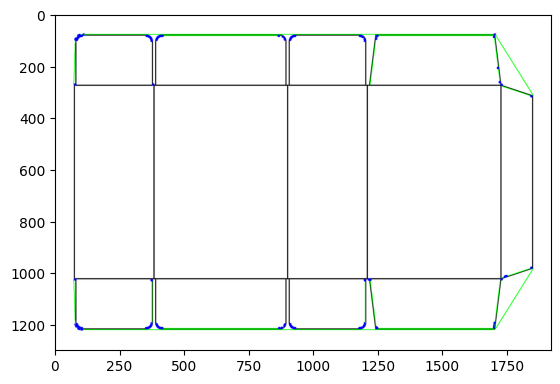

In [84]:
plt.imshow(img, 'gray')

In [69]:
def normalize_filled(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh2 = cv.threshold(img, 127, 255,0)
    contours,hierarchy = cv.findContours(thresh,2,1)
    print(hierarchy)
    print(len(contours))
    # fill shape
    cv2.fillPoly(img, pts=contours, color=(255,255,255))
    bounding_rect = cv2.boundingRect(cnt[0])
    print(bounding_rect)
    # img_cropped_bounding_rect = img[bounding_rect[1]:bounding_rect[1] + bounding_rect[3], bounding_rect[0]:bounding_rect[0] + bounding_rect[2]]
    # resize all to same size
    img_resized = cv2.resize(img, (300, 300))
    return img_resized

In [70]:
img = cv.imread('dataset/img/img_1.jpg')
img = normalize_filled(img)

[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [ 8  6 -1 -1]
  [ 9  7 -1 -1]
  [10  8 -1 -1]
  [11  9 -1 -1]
  [12 10 -1 -1]
  [13 11 -1 -1]
  [14 12 -1 -1]
  [15 13 -1 -1]
  [-1 14 16 -1]
  [-1 -1 -1 15]]]
17
(111, 79, 1, 1)


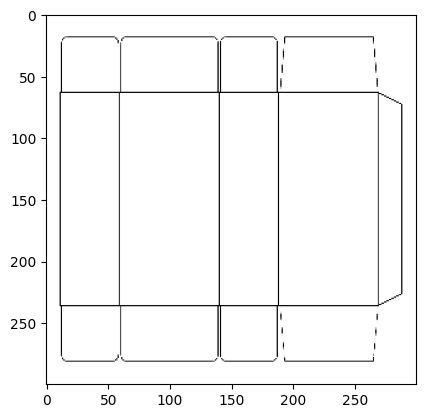

In [68]:
plt.imshow(img, 'gray')

In [71]:

filename = 'dataset/img/img_1.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
#result is dilated for marking the corners, not important
dst = cv.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]


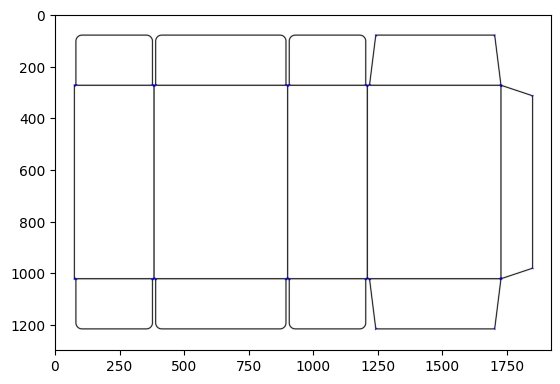

In [72]:
plt.imshow(img, 'gray')

In [73]:
import cv2 as cv
filename = 'dataset/img/img_1.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04)
dst = cv.dilate(dst,None)
ret, dst = cv.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)
# Now draw them
res = np.hstack((centroids,corners))
res = np.int0(res)
img[res[:,1],res[:,0]]=[0,0,255]
img[res[:,3],res[:,2]] = [0,255,0]

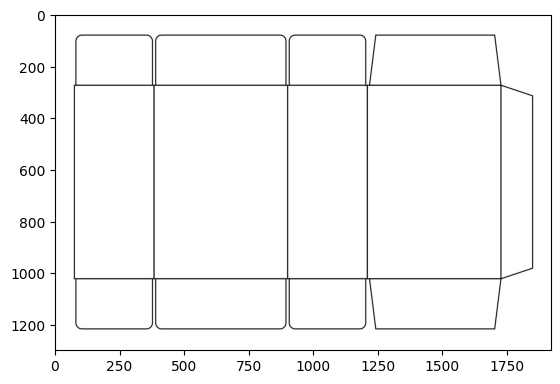

In [74]:
plt.imshow(img, 'gray')